# Deliverable 3: Optimize the Model

In [70]:
import sys
sys.path

['/Users/m009223/UofM-VIRT-DATA-PT-12-2021-U-B/Neural_Network_Charity_Analysis',
 '/Users/m009223/opt/anaconda3/lib/python39.zip',
 '/Users/m009223/opt/anaconda3/lib/python3.9',
 '/Users/m009223/opt/anaconda3/lib/python3.9/lib-dynload',
 '',
 '/Users/m009223/opt/anaconda3/lib/python3.9/site-packages',
 '/Users/m009223/opt/anaconda3/lib/python3.9/site-packages/aeosa',
 '/Users/m009223/opt/anaconda3/lib/python3.9/site-packages/locket-0.2.1-py3.9.egg',
 '/Users/m009223/opt/anaconda3/lib/python3.9/site-packages/IPython/extensions',
 '/Users/m009223/.ipython',
 '/Users/m009223/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages',
 '/Users/m009223/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages']

In [71]:
sys.path.append('/Users/m009223/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages')

In [72]:
# Add our dependencies.
import csv
import os

import warnings
warnings.filterwarnings('ignore')

In [73]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [74]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns = ['EIN', 'NAME'], axis=1)
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [75]:
#Check for null values?
application_df.isna().sum()

APPLICATION_TYPE          0
AFFILIATION               0
CLASSIFICATION            0
USE_CASE                  0
ORGANIZATION              0
STATUS                    0
INCOME_AMT                0
SPECIAL_CONSIDERATIONS    0
ASK_AMT                   0
IS_SUCCESSFUL             0
dtype: int64

In [76]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [77]:
# Look at APPLICATION_TYPE value counts for binning
app_type_count = application_df['APPLICATION_TYPE'].value_counts()
app_type_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

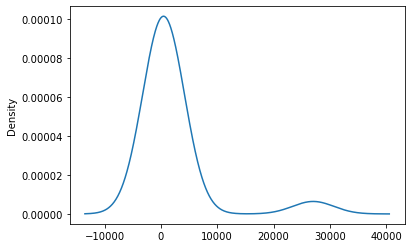

In [78]:
# Visualize the value counts of APPLICATION_TYPE
app_type_count.plot.density()

In [79]:
# Determine which values to replace if counts are less than ...?
replace_application = list(app_type_count[app_type_count <500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [80]:
# Look at CLASSIFICATION value counts for binning
class_values = application_df['CLASSIFICATION']
classification_counts = application_df['CLASSIFICATION'].value_counts()
classification_counts.head(20)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
Name: CLASSIFICATION, dtype: int64

<AxesSubplot:ylabel='Density'>

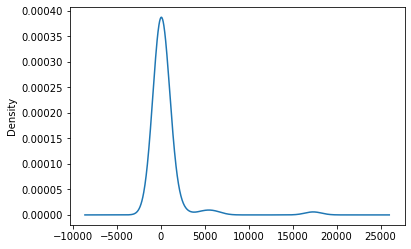

In [81]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [82]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts <1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

## ATTEMPT 1

In [83]:
#First Modification: Check out Income Amt to see if maybe that coud be binned or dropped
#Create list of income columns to discover if there are any null values
income_counts = application_df["INCOME_AMT"].value_counts()
income_counts
#app_type_count = application_df['APPLICATION_TYPE'].value_counts()

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

About 71% of the organizations have zero income listed.  This makes sense to me since they are non-profit and I used to be the Treasurer of a non-profit Classical Youth Orchestra. We could try replacing the column all together or reducing the number of unique values.  This could help ensure that this feature and the imbalanced distribution of these integer amounts doesn't confuse the model.

<AxesSubplot:ylabel='Density'>

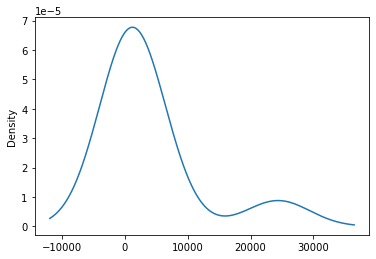

In [84]:
# Plot the "INCOME_AMT" value distributions
income_counts.plot.density()

In [85]:
# Try reducing nmber of unique income values to two bins - 0 income and other
replace_income = list(income_counts[income_counts < 10000].index)

In [86]:
#Create dataframe copy for experimental purposes
application_df1 = application_df.copy()

In [87]:
#Replace income amount in dataframe
for income in replace_income:
    application_df1['INCOME_AMT'] = application_df1['INCOME_AMT'].replace(income,"Other")

In [88]:
#Check binning
application_df1['INCOME_AMT'].value_counts()

0        24388
Other     9911
Name: INCOME_AMT, dtype: int64

In [89]:
#Second modification - Consider dropping the "STATUS" column (not sure what this signifies)
#Look at 'STATUS' value counts for possible binning or dropping of this column
status_counts = application_df1['STATUS'].value_counts()
status_counts

1    34294
0        5
Name: STATUS, dtype: int64

In [90]:
application_df1 = application_df1.drop(['STATUS'], axis=1)
application_df1.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,Other,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,Other,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,Other,N,142590,1


In [91]:
#Third modification - Consider dropping the "SPECIAL_CONSIDERATIONS" column (not sure what this signifies)
#Look at 'SPECIAL_CONSIDERATIONS' value counts for possible binning or dropping of this column

special_counts = application_df1['SPECIAL_CONSIDERATIONS'].value_counts()
special_counts

N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64

In [92]:
#Filter dataframe to show column values for only organizations that are classified as "SPECIAL_CONSIDERATIONS"
#Determine whether to remove column entirely as a possibility if data doesn't appear valuable
Yes_df = application_df1[application_df1['SPECIAL_CONSIDERATIONS'] == 'Y']
Yes_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
1374,T3,Independent,C2000,Preservation,Association,0,Y,5000,0
2928,T3,Independent,C1000,Preservation,Trust,Other,Y,7287,1
6056,T3,Independent,Other,Preservation,Trust,0,Y,5000,1
6805,T3,Independent,C1000,Preservation,Trust,Other,Y,5000,1
7747,T3,Independent,C1000,Preservation,Trust,0,Y,5000,0
9437,T3,Independent,C1000,Preservation,Trust,0,Y,5000,1
9941,T3,Independent,C1000,Preservation,Trust,Other,Y,53897,0
12318,T3,Independent,C1000,Preservation,Trust,Other,Y,7416,1
13998,T3,Independent,C1200,Preservation,Trust,0,Y,5000,0
14575,T3,Independent,C1000,Preservation,Trust,Other,Y,15503,0


In [93]:
#Drop "SPECIAL_CONSIDERATIONS" as this doesn't look like it provides much value
application_df1 = application_df1.drop(['SPECIAL_CONSIDERATIONS'], axis=1)
application_df1.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,0,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,Other,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,Other,6692,1
4,T3,Independent,C1000,Heathcare,Trust,Other,142590,1


In [94]:
# Generate our categorical variable lists
application_cat = application_df1.dtypes[application_df1.dtypes == "object"].index.tolist()

In [95]:
#Check number of unique values for each category variable
application_df1[application_cat].nunique()

APPLICATION_TYPE    9
AFFILIATION         6
CLASSIFICATION      6
USE_CASE            5
ORGANIZATION        4
INCOME_AMT          2
dtype: int64

In [96]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df1[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_Other
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [97]:
# Merge one-hot encoded features and drop the originals
application_df1 = application_df1.merge(encode_df, left_index=True, right_index=True)
application_df1 = application_df1.drop(application_cat, axis=1)
application_df1.head()

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_Other
0,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [99]:
# Split our preprocessed data into our features and target arrays
X = application_df1.drop(['IS_SUCCESSFUL'], axis=1).values
y = application_df1['IS_SUCCESSFUL'].values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [100]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [101]:
len(X_train_scaled[0])

33

In [102]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 60
hidden_nodes_layer2 = 20

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, activation="relu", input_dim=number_input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                2040      
                                                                 
 dense_1 (Dense)             (None, 20)                1220      
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 3,281
Trainable params: 3,281
Non-trainable params: 0
_________________________________________________________________


2022-06-08 05:07:36.496845: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [103]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [104]:
# Train the model
import os
from tensorflow.keras.callbacks import ModelCheckpoint

os.makedirs("checkpoints/", exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

#Create a callback that saves the model's weights every 5 epochs
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=4020)

#Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5723 - accuracy: 0.7164
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5587 - accuracy: 0.7236
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5567 - accuracy: 0.7251
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5558 - accuracy: 0.7253
Epoch 5/100
798/804 [============================>.] - ETA: 0s - loss: 0.5530 - accuracy: 0.7272
Epoch 5: saving model to checkpoints/weights.05.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5536 - accuracy: 0.7267
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5532 - accuracy: 0.7261
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5530 - accuracy: 0.7268
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5525 - accuracy: 0.7275
Epoch 9/100
804/804 [==============================] -

779/804 [============================>.] - ETA: 0s - loss: 0.5436 - accuracy: 0.7336
Epoch 65: saving model to checkpoints/weights.65.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5438 - accuracy: 0.7336
Epoch 66/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5440 - accuracy: 0.7335
Epoch 67/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5437 - accuracy: 0.7329
Epoch 68/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5440 - accuracy: 0.7329
Epoch 69/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5438 - accuracy: 0.7346
Epoch 70/100
794/804 [============================>.] - ETA: 0s - loss: 0.5436 - accuracy: 0.7333
Epoch 70: saving model to checkpoints/weights.70.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5433 - accuracy: 0.7335
Epoch 71/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5438 - accuracy: 0.7343
Epoch 72/100
804/804 

In [105]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5571 - accuracy: 0.7285 - 403ms/epoch - 2ms/step
Loss: 0.5571384429931641, Accuracy: 0.7285131216049194


<AxesSubplot:>

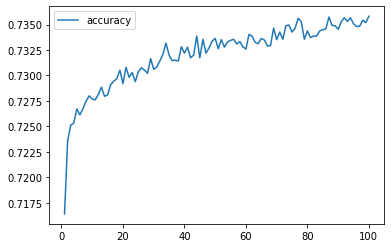

In [106]:
# Plot accuracy
history_df = pd.DataFrame(fit_model.history, index=range(1, len(fit_model.history['loss'])+1))
history_df.plot(y='accuracy')

In [121]:
#Export model to an HDF5 file
nn.save('AlphabetSoupCharity_Optimization1.h5')

## ATTEMPT 2- Keep Attempt 1 dataframe modifications but
### - increase number of epochs to 500
### - change number of hidden layers to 3
### - Return to original neuron count

In [109]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, activation="relu", input_dim=number_input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 80)                2720      
                                                                 
 dense_8 (Dense)             (None, 30)                2430      
                                                                 
 dense_9 (Dense)             (None, 10)                310       
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 5,471
Trainable params: 5,471
Non-trainable params: 0
_________________________________________________________________


In [110]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [111]:
# Train the model
import os
from tensorflow.keras.callbacks import ModelCheckpoint

os.makedirs("checkpoints_opt2/", exist_ok=True)
checkpoint_path = "checkpoints_opt2/weights.{epoch:02d}.hdf5"

#Create a callback that saves the model's weights every 5 epochs
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=4020)

#Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=500, callbacks=[cp_callback])

Epoch 1/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5723 - accuracy: 0.7142
Epoch 2/500
804/804 [==============================] - 1s 2ms/step - loss: 0.5588 - accuracy: 0.7219
Epoch 3/500
804/804 [==============================] - 1s 2ms/step - loss: 0.5566 - accuracy: 0.7244
Epoch 4/500
804/804 [==============================] - 1s 2ms/step - loss: 0.5549 - accuracy: 0.7248
Epoch 5/500
779/804 [============================>.] - ETA: 0s - loss: 0.5529 - accuracy: 0.7273
Epoch 5: saving model to checkpoints_opt2/weights.05.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5533 - accuracy: 0.7271
Epoch 6/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5530 - accuracy: 0.7278
Epoch 7/500
804/804 [==============================] - 1s 2ms/step - loss: 0.5525 - accuracy: 0.7267
Epoch 8/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5519 - accuracy: 0.7288
Epoch 9/500
804/804 [============================

804/804 [==============================] - 2s 2ms/step - loss: 0.5427 - accuracy: 0.7349
Epoch 65/500
777/804 [===========================>..] - ETA: 0s - loss: 0.5426 - accuracy: 0.7344
Epoch 65: saving model to checkpoints_opt2/weights.65.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5429 - accuracy: 0.7344
Epoch 66/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5429 - accuracy: 0.7345
Epoch 67/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5425 - accuracy: 0.7342
Epoch 68/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5432 - accuracy: 0.7334
Epoch 69/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5426 - accuracy: 0.7345
Epoch 70/500
798/804 [============================>.] - ETA: 0s - loss: 0.5425 - accuracy: 0.7343
Epoch 70: saving model to checkpoints_opt2/weights.70.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5427 - accuracy: 0.7343
Epoch 71/50

804/804 [==============================] - 2s 2ms/step - loss: 0.5404 - accuracy: 0.7363
Epoch 126/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5399 - accuracy: 0.7367
Epoch 127/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5402 - accuracy: 0.7366
Epoch 128/500
804/804 [==============================] - 1s 2ms/step - loss: 0.5403 - accuracy: 0.7368
Epoch 129/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5406 - accuracy: 0.7357
Epoch 130/500
779/804 [============================>.] - ETA: 0s - loss: 0.5401 - accuracy: 0.7364
Epoch 130: saving model to checkpoints_opt2/weights.130.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5403 - accuracy: 0.7364
Epoch 131/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5403 - accuracy: 0.7372
Epoch 132/500
804/804 [==============================] - 1s 2ms/step - loss: 0.5408 - accuracy: 0.7360
Epoch 133/500
804/804 [=====================

804/804 [==============================] - 1s 2ms/step - loss: 0.5388 - accuracy: 0.7369
Epoch 188/500
804/804 [==============================] - 1s 2ms/step - loss: 0.5391 - accuracy: 0.7370
Epoch 189/500
804/804 [==============================] - 1s 2ms/step - loss: 0.5388 - accuracy: 0.7369
Epoch 190/500
798/804 [============================>.] - ETA: 0s - loss: 0.5404 - accuracy: 0.7367
Epoch 190: saving model to checkpoints_opt2/weights.190.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5404 - accuracy: 0.7367
Epoch 191/500
804/804 [==============================] - 1s 2ms/step - loss: 0.5386 - accuracy: 0.7378
Epoch 192/500
804/804 [==============================] - 1s 2ms/step - loss: 0.5390 - accuracy: 0.7372
Epoch 193/500
804/804 [==============================] - 1s 2ms/step - loss: 0.5391 - accuracy: 0.7369
Epoch 194/500
804/804 [==============================] - 1s 2ms/step - loss: 0.5388 - accuracy: 0.7366
Epoch 195/500
798/804 [=====================

804/804 [==============================] - 2s 2ms/step - loss: 0.5381 - accuracy: 0.7375
Epoch 250/500
782/804 [============================>.] - ETA: 0s - loss: 0.5372 - accuracy: 0.7380
Epoch 250: saving model to checkpoints_opt2/weights.250.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5379 - accuracy: 0.7374
Epoch 251/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5386 - accuracy: 0.7369
Epoch 252/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5381 - accuracy: 0.7371
Epoch 253/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5382 - accuracy: 0.7377
Epoch 254/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5388 - accuracy: 0.7373
Epoch 255/500
802/804 [============================>.] - ETA: 0s - loss: 0.5385 - accuracy: 0.7371
Epoch 255: saving model to checkpoints_opt2/weights.255.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5383 - accuracy: 0.7373
E

804/804 [==============================] - 2s 2ms/step - loss: 0.5375 - accuracy: 0.7380
Epoch 311/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5373 - accuracy: 0.7385
Epoch 312/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5379 - accuracy: 0.7372
Epoch 313/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5377 - accuracy: 0.7382
Epoch 314/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5382 - accuracy: 0.7374
Epoch 315/500
799/804 [============================>.] - ETA: 0s - loss: 0.5375 - accuracy: 0.7379
Epoch 315: saving model to checkpoints_opt2/weights.315.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5376 - accuracy: 0.7379
Epoch 316/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5376 - accuracy: 0.7372
Epoch 317/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5377 - accuracy: 0.7366
Epoch 318/500
804/804 [=====================

804/804 [==============================] - 2s 2ms/step - loss: 0.5374 - accuracy: 0.7384
Epoch 373/500
804/804 [==============================] - 1s 2ms/step - loss: 0.5369 - accuracy: 0.7390
Epoch 374/500
804/804 [==============================] - 1s 2ms/step - loss: 0.5378 - accuracy: 0.7378
Epoch 375/500
798/804 [============================>.] - ETA: 0s - loss: 0.5373 - accuracy: 0.7377
Epoch 375: saving model to checkpoints_opt2/weights.375.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5374 - accuracy: 0.7378
Epoch 376/500
804/804 [==============================] - 1s 2ms/step - loss: 0.5371 - accuracy: 0.7388
Epoch 377/500
804/804 [==============================] - 1s 2ms/step - loss: 0.5376 - accuracy: 0.7380
Epoch 378/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5369 - accuracy: 0.7385
Epoch 379/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5373 - accuracy: 0.7379
Epoch 380/500
792/804 [=====================

804/804 [==============================] - 2s 2ms/step - loss: 0.5370 - accuracy: 0.7374
Epoch 435/500
785/804 [============================>.] - ETA: 0s - loss: 0.5375 - accuracy: 0.7381
Epoch 435: saving model to checkpoints_opt2/weights.435.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5369 - accuracy: 0.7382
Epoch 436/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5373 - accuracy: 0.7383
Epoch 437/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5382 - accuracy: 0.7380
Epoch 438/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5373 - accuracy: 0.7384
Epoch 439/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5373 - accuracy: 0.7387
Epoch 440/500
788/804 [============================>.] - ETA: 0s - loss: 0.5390 - accuracy: 0.7388
Epoch 440: saving model to checkpoints_opt2/weights.440.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5389 - accuracy: 0.7385
E

Epoch 496/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5365 - accuracy: 0.7388
Epoch 497/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5366 - accuracy: 0.7381
Epoch 498/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5369 - accuracy: 0.7384
Epoch 499/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5368 - accuracy: 0.7388
Epoch 500/500
788/804 [============================>.] - ETA: 0s - loss: 0.5357 - accuracy: 0.7393
Epoch 500: saving model to checkpoints_opt2/weights.500.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5367 - accuracy: 0.7387


In [112]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5778 - accuracy: 0.7259 - 354ms/epoch - 1ms/step
Loss: 0.5777945518493652, Accuracy: 0.7259474992752075


<AxesSubplot:>

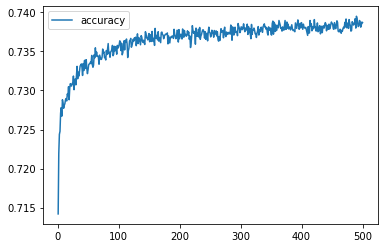

In [113]:
# Plot accuracy
history_df = pd.DataFrame(fit_model.history, index=range(1, len(fit_model.history['loss'])+1))
history_df.plot(y='accuracy')

In [120]:
#Export model to an HDF5 file
nn.save('AlphabetSoupCharity_Optimization2.h5')

## ATTEMPT 3- Keep Attempt 1 dataframe modifications but
### - split the differerence on the number of epochs and use 300 this time
### - stay with 3 hidden layers
### - Use 60, 20, and 10 respectively for the hidden layers this time

In [114]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 60
hidden_nodes_layer2 = 20
hidden_nodes_layer3 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, activation="relu", input_dim=number_input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 60)                2040      
                                                                 
 dense_12 (Dense)            (None, 20)                1220      
                                                                 
 dense_13 (Dense)            (None, 10)                210       
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 3,481
Trainable params: 3,481
Non-trainable params: 0
_________________________________________________________________


In [115]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [116]:
# Train the model
import os
from tensorflow.keras.callbacks import ModelCheckpoint

os.makedirs("checkpoints_opt3/", exist_ok=True)
checkpoint_path = "checkpoints_opt3/weights.{epoch:02d}.hdf5"

#Create a callback that saves the model's weights every 5 epochs
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=4020)

#Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=300, callbacks=[cp_callback])

Epoch 1/300
804/804 [==============================] - 2s 2ms/step - loss: 0.5750 - accuracy: 0.7125
Epoch 2/300
804/804 [==============================] - 1s 2ms/step - loss: 0.5581 - accuracy: 0.7246
Epoch 3/300
804/804 [==============================] - 1s 2ms/step - loss: 0.5567 - accuracy: 0.7265
Epoch 4/300
804/804 [==============================] - 1s 2ms/step - loss: 0.5551 - accuracy: 0.7273
Epoch 5/300
786/804 [============================>.] - ETA: 0s - loss: 0.5542 - accuracy: 0.7277
Epoch 5: saving model to checkpoints_opt3/weights.05.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5542 - accuracy: 0.7280
Epoch 6/300
804/804 [==============================] - 1s 2ms/step - loss: 0.5538 - accuracy: 0.7276
Epoch 7/300
804/804 [==============================] - 1s 2ms/step - loss: 0.5527 - accuracy: 0.7287
Epoch 8/300
804/804 [==============================] - 2s 2ms/step - loss: 0.5518 - accuracy: 0.7289
Epoch 9/300
804/804 [============================

804/804 [==============================] - 2s 2ms/step - loss: 0.5432 - accuracy: 0.7334
Epoch 65/300
778/804 [============================>.] - ETA: 0s - loss: 0.5433 - accuracy: 0.7351
Epoch 65: saving model to checkpoints_opt3/weights.65.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5433 - accuracy: 0.7349
Epoch 66/300
804/804 [==============================] - 2s 2ms/step - loss: 0.5428 - accuracy: 0.7340
Epoch 67/300
804/804 [==============================] - 2s 2ms/step - loss: 0.5426 - accuracy: 0.7342
Epoch 68/300
804/804 [==============================] - 2s 2ms/step - loss: 0.5430 - accuracy: 0.7343
Epoch 69/300
804/804 [==============================] - 1s 2ms/step - loss: 0.5430 - accuracy: 0.7345
Epoch 70/300
785/804 [============================>.] - ETA: 0s - loss: 0.5428 - accuracy: 0.7334
Epoch 70: saving model to checkpoints_opt3/weights.70.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5428 - accuracy: 0.7341
Epoch 71/30

804/804 [==============================] - 2s 2ms/step - loss: 0.5403 - accuracy: 0.7366
Epoch 126/300
804/804 [==============================] - 1s 2ms/step - loss: 0.5408 - accuracy: 0.7368
Epoch 127/300
804/804 [==============================] - 1s 2ms/step - loss: 0.5406 - accuracy: 0.7367
Epoch 128/300
804/804 [==============================] - 1s 2ms/step - loss: 0.5401 - accuracy: 0.7369
Epoch 129/300
804/804 [==============================] - 1s 2ms/step - loss: 0.5405 - accuracy: 0.7358
Epoch 130/300
790/804 [============================>.] - ETA: 0s - loss: 0.5401 - accuracy: 0.7373
Epoch 130: saving model to checkpoints_opt3/weights.130.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5401 - accuracy: 0.7372
Epoch 131/300
804/804 [==============================] - 2s 2ms/step - loss: 0.5403 - accuracy: 0.7366
Epoch 132/300
804/804 [==============================] - 2s 3ms/step - loss: 0.5401 - accuracy: 0.7370
Epoch 133/300
804/804 [=====================

804/804 [==============================] - 1s 2ms/step - loss: 0.5390 - accuracy: 0.7372
Epoch 188/300
804/804 [==============================] - 2s 2ms/step - loss: 0.5390 - accuracy: 0.7366
Epoch 189/300
804/804 [==============================] - 2s 2ms/step - loss: 0.5393 - accuracy: 0.7367
Epoch 190/300
789/804 [============================>.] - ETA: 0s - loss: 0.5386 - accuracy: 0.7373
Epoch 190: saving model to checkpoints_opt3/weights.190.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5387 - accuracy: 0.7369
Epoch 191/300
804/804 [==============================] - 2s 2ms/step - loss: 0.5387 - accuracy: 0.7371
Epoch 192/300
804/804 [==============================] - 2s 2ms/step - loss: 0.5394 - accuracy: 0.7378
Epoch 193/300
804/804 [==============================] - 2s 2ms/step - loss: 0.5390 - accuracy: 0.7363
Epoch 194/300
804/804 [==============================] - 2s 2ms/step - loss: 0.5391 - accuracy: 0.7377
Epoch 195/300
796/804 [=====================

804/804 [==============================] - 2s 2ms/step - loss: 0.5384 - accuracy: 0.7379
Epoch 250/300
795/804 [============================>.] - ETA: 0s - loss: 0.5377 - accuracy: 0.7381
Epoch 250: saving model to checkpoints_opt3/weights.250.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5381 - accuracy: 0.7378
Epoch 251/300
804/804 [==============================] - 2s 2ms/step - loss: 0.5380 - accuracy: 0.7386
Epoch 252/300
804/804 [==============================] - 2s 2ms/step - loss: 0.5380 - accuracy: 0.7369
Epoch 253/300
804/804 [==============================] - 2s 2ms/step - loss: 0.5384 - accuracy: 0.7378
Epoch 254/300
804/804 [==============================] - 2s 2ms/step - loss: 0.5386 - accuracy: 0.7371
Epoch 255/300
798/804 [============================>.] - ETA: 0s - loss: 0.5381 - accuracy: 0.7377
Epoch 255: saving model to checkpoints_opt3/weights.255.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5381 - accuracy: 0.7377
E

In [117]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5653 - accuracy: 0.7237 - 374ms/epoch - 1ms/step
Loss: 0.5652713179588318, Accuracy: 0.7237317562103271


<AxesSubplot:>

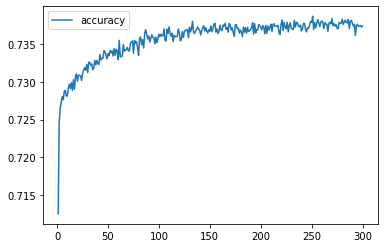

In [118]:
# Plot accuracy
history_df = pd.DataFrame(fit_model.history, index=range(1, len(fit_model.history['loss'])+1))
history_df.plot(y='accuracy')

In [119]:
#Export model to an HDF5 file
nn.save('AlphabetSoupCharity_Optimization3.h5')